# **TikTok Project**
<img src='https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/LcSfTRYDT-ehHfwPhi_3Jg_5edac913594546eaa12971b0dad5b0f1_image.png?expiry=1714003200000&hmac=TiwJLio5gzNCjp0ax0ndHiL78PeAAnPEfUCTK2VhRek'>

## Project scenario
### Background
TikTok is the leading destination for short-form mobile video. The platform is built to help imaginations thrive. TikTok's mission is to create a place for inclusive, joyful, and authentic content–where people can safely discover, create, and connect.

TikTok users have the ability to report videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. This process generates a large number of user reports that are difficult to address quickly. 

TikTok is working on the **development of a predictive model that can determine whether a video contains a claim or offers an opinion**. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

### Data dictionary

This project uses a dataset called [tiktok_dataset.csv](tiktok_dataset.csv). It contains synthetic data created for this project in partnership with TikTok. Examine each data variable gathered. 

**19,383 rows** – Each row represents a different published TikTok video in which a claim/opinion has been made.

**12 columns** 

| **Column name**          | **Type** | **Description**                                                                                                                                                                                                                                                     |
| ------------------------ | -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| #                        | int      | TikTok assigned number for video with claim/opinion.                                                                                                                                                                                                                |
| claim_status             | obj      | Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source. |
| video_id                 | int      | Random identifying number assigned to video upon publication on TikTok.                                                                                                                                                                                             |
| video_duration_sec       | int      | How long the published video is measured in seconds.                                                                                                                                                                                                                |
| video_transcription_text | obj      | Transcribed text of the words spoken in the published video.                                                                                                                                                                                                        |
| verified_status          | obj      | Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”                                                                                                                                |
| author_ban_status        | obj      | Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under review,” or “banned.”                                                                                                                             |
| video_view_count         | float    | The total number of times the published video has been viewed.                                                                                                                                                                                                      |
| video_like_count         | float    | The total number of times the published video has been liked by other users.                                                                                                                                                                                        |
| video_share_count        | float    | The total number of times the published video has been shared by other users.                                                                                                                                                                                       |
| video_download_count     | float    | The total number of times the published video has been downloaded by other users.                                                                                                                                                                                   |
| video_comment_count      | float    | The total number of comments on the published video.                                                                                                                                                                                                                |


## Explore and Preprocess Data
### Imports and data loading

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# load dataset
df = pd.read_csv('tiktok_dataset.csv')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


### Data Exploration

In [3]:
# get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
# get summary statistics
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Our dataset has 19382 observations but some of the variables have missing values, including our target variable `claim_status`. Most of the numerical variables seem to have outliers towards the upper end of their distribution. 

To build predictive model, we will drop rows with missing values, check for duplicates and remove unhelpful features (`#` and `video_id`).

In [5]:
# drop rows missing values
df = df.dropna(axis=0)
df.shape

(19084, 12)

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# drop unused features
df = df.drop(['#', 'video_id'], axis=1)
df.shape

(19084, 10)

Next, let's check the distribution of our tagret variable - `claim status`.

In [8]:
# check the balance of classes
df['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The counts of each claim status are quite balanced. Next let's create a pairplot to quickly check the distribution and relationships between numerical variables and target.

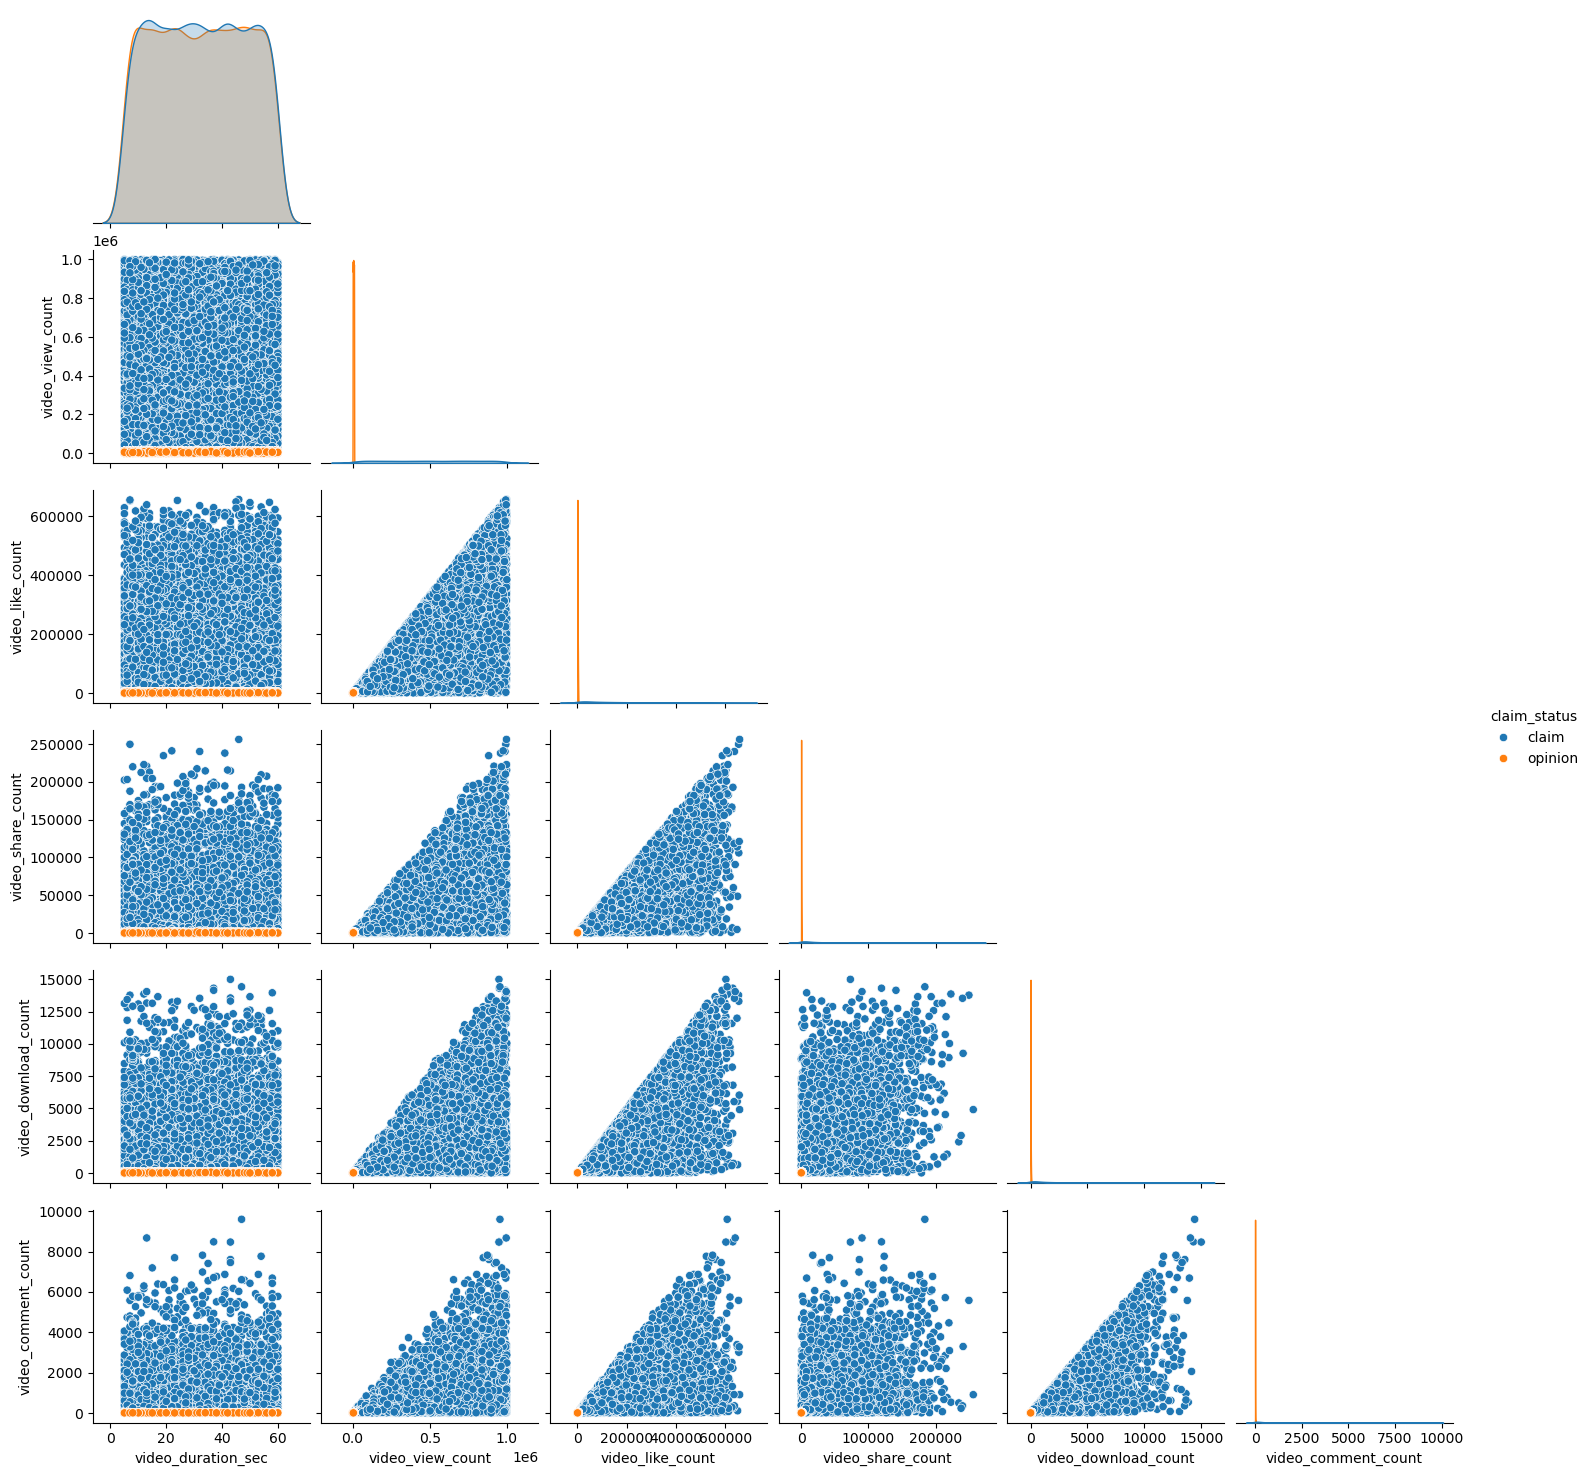

In [9]:
# draw a pairplot
sns.pairplot(df, hue='claim_status', corner=True)

Except `video_duration_sec`, other features seem to have noticeable relationships with each other. They also show wide discrepancies between videos labeled as claims and videos labeled as opinions. We will take a closer look at these features.

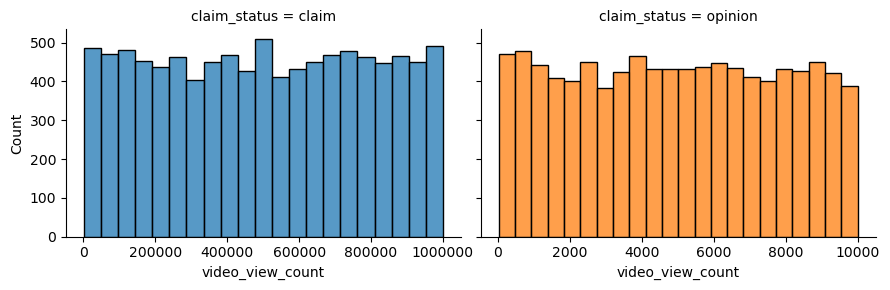

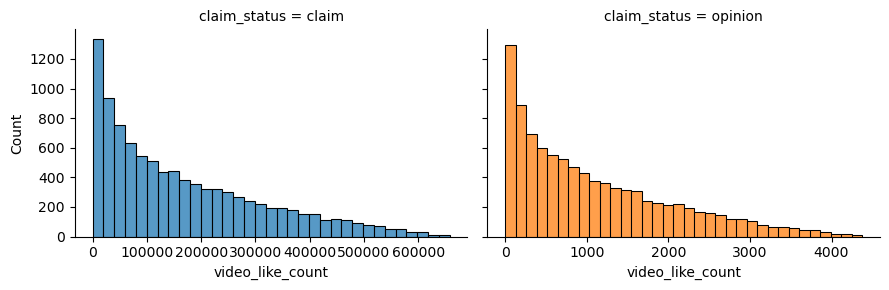

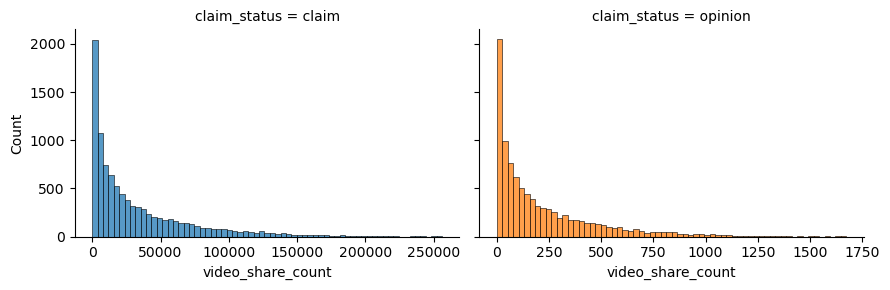

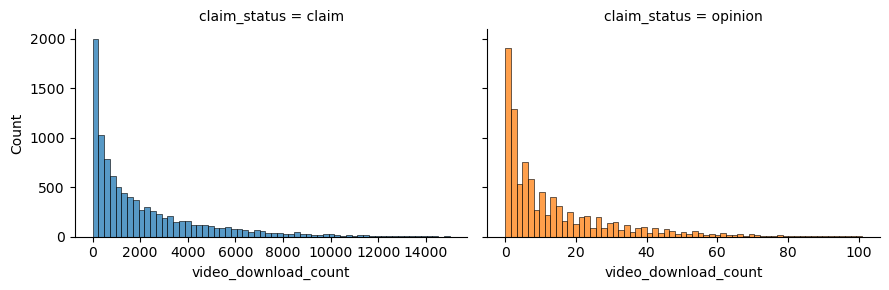

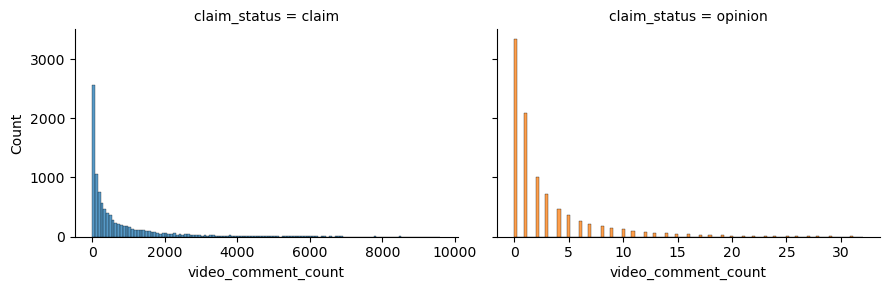

In [10]:
v = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
for i in v:
    g = sns.FacetGrid(df, col='claim_status', sharex=False, hue='claim_status', height=3, aspect=1.5)
    g.map(sns.histplot, i)
    for ax in g.axes.flatten():
        ax.get_xaxis().get_major_formatter().set_scientific(False)

Overall, the plot reveals that each feature's distribution seem to share a similar pattern between "claim" and "opinion" videos. However the ones labeled as "claim" have far more engagements than those labeled as "opinion".

Other than `video_view_count`, most of features are very skewed to the right and show the presence of outliers. Nonetheless, these values are likely not typos or errors. They actually align with how social media works - the viral content will receive an unusual amount of engagements.

Now, let's examine the categorical variables.

<Axes: xlabel='verified_status', ylabel='count'>

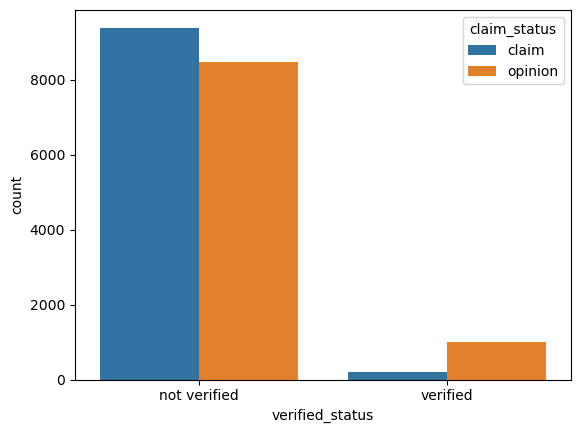

In [11]:
# claim status by verification status
sns.countplot(df, x='verified_status', hue='claim_status')

There are far fewer verified users than unverified users, but if a user is verified, their videos are much less likely to be labeled "claim".

<Axes: xlabel='author_ban_status', ylabel='count'>

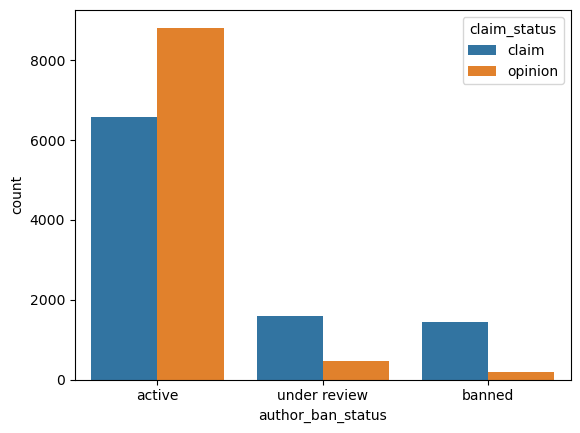

In [12]:
# claim status by author ban status
sns.countplot(df, x='author_ban_status', hue='claim_status', order=['active', 'under review', 'banned'])

Again there are many more active authors. Those who come under review or get banned are more likely to post "claim" videos.

Finally, let's examine correlation between variables.

<Axes: >

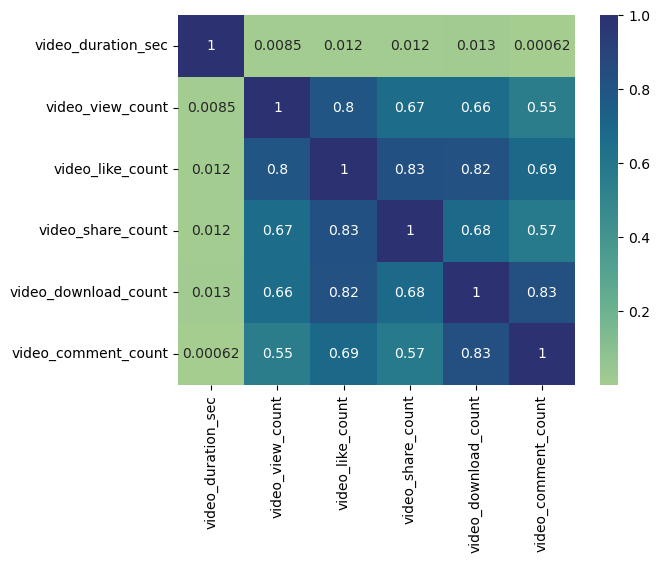

In [13]:
# visualize correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest")

The heatmap shows that there are strong correlations between `video_like_count` and `video_view_count`, `video_share_count` and `video_download_count`.

### Feature engineering

#### Encode target and catgorical variables

In [14]:
X = df.copy()

# encode target variable
X['claim_status'] = X['claim_status'].map({'opinion': 0, 'claim': 1})

# dummy encode remaining categorical values
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)

X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,False,False,False


In [15]:
# Select outcome variable
y = X.pop('claim_status')
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,False,False,False


#### Split the data

Split the data set into training and test sets with ratio of 65/25.

In [16]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# check shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 10), (4771, 10), (14313,), (4771,))

#### Text feature extraction
Since `video_transcription_text` is text-based, we will extract features from it using sklearn's `TfidfVectorizer`. 

In [17]:
# extract numerical features from `video_transcription_text` in the training set
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 3),
                            max_features=10,
                            stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train['video_transcription_text']).toarray()
tfidf_df = pd.DataFrame(data=tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out()) 
tfidf_df.head()

,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,media claim,read media,social media
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.582477,0.0,0.0,0.0,0.0,0.0,0.552073,0.596604,0.0
3,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [18]:
# concatenate the TF-IDF features with the original DataFrame
X_train = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), tfidf_df], axis=1)
X_train.shape

(14313, 19)

In [19]:
# extract numerical features from `video_transcription_text` in the testing set
test_tfidf_matrix = tfidf_vectorizer.transform(X_test['video_transcription_text']).toarray()
test_tfidf_df = pd.DataFrame(data=test_tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out()) 
X_test = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_tfidf_df], axis=1)
X_test.shape

(4771, 19)

#### Feature scaling
Since the data have many outliers, we will use `RobustScaler` to scale numerical features that used in non-tree based models.

In [20]:
feature_to_scale = ['video_duration_sec', 'video_view_count', 'video_like_count','video_share_count', 'video_download_count', 'video_comment_count']
cat_feature = [i for i in X_train.columns if i not in feature_to_scale]
feature_scaled = [i+"_scaled" for i in feature_to_scale]

In [21]:
rc = RobustScaler()
X_train[feature_scaled] = rc.fit_transform(X_train[feature_to_scale])
X_test[feature_scaled] = rc.transform(X_test[feature_to_scale])

X_train.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague learned,...,learned media,media claim,read media,social media,video_duration_sec_scaled,video_view_count_scaled,video_like_count_scaled,video_share_count_scaled,video_download_count_scaled,video_comment_count_scaled
0,34,816695.0,149641.0,1482.0,185.0,24.0,False,False,True,0.0,...,0.0,0.000000,0.000000,0.0,0.071429,1.621252,1.168748,0.040701,0.119828,0.047782
1,40,903.0,50.0,8.0,0.0,0.0,True,False,False,0.0,...,0.0,0.000000,0.000000,0.0,0.285714,-0.019906,-0.027272,-0.039078,-0.039655,-0.034130
2,54,311925.0,192219.0,27014.0,4427.0,2545.0,False,False,False,0.0,...,0.0,0.552073,0.596604,0.0,0.785714,0.605788,1.509171,1.422602,3.776724,8.651877
3,46,598217.0,312441.0,75662.0,2947.0,448.0,False,False,False,0.0,...,0.0,0.000000,0.000000,0.0,0.500000,1.181732,2.470378,4.055640,2.500862,1.494881
4,40,2660.0,575.0,223.0,0.0,0.0,True,False,True,0.0,...,0.0,0.000000,0.000000,0.0,0.285714,-0.016372,-0.023074,-0.027441,-0.039655,-0.034130


## Model building

### Model selection
In our case, identifying claims was the priority, so we will use cross-validation to select the model that performs best on recall.

In [22]:
# group features used in each type of models
scaled = feature_scaled + cat_feature
no_scale = feature_to_scale + cat_feature
logistic = [i for i in scaled if i!='video_like_count_scaled'] # exclude variable that have multicollinearity

# list of model tested
models = [
    ('Logstic Regression', LogisticRegression(random_state=0), logistic),
    ('KNN', KNeighborsClassifier(n_neighbors=3), scaled),
    ('SVM', SVC(random_state=0), scaled),
    ('Naive Bayes', GaussianNB(), scaled),
    ('Decision Tree', DecisionTreeClassifier(random_state=0), no_scale),
    ('Random Forest', RandomForestClassifier(random_state=0), no_scale)
]

# evaluate recall by cross-validation
print('Average Recall Score')
for (name, model, features) in models:
    score = cross_val_score(model, X_train[features], y_train, cv=5, scoring="recall")
    print(f"{name}: {score.mean()}")

Average Recall Score
Logstic Regression: 0.9723654770586505
KNN: 0.9806546789509254
SVM: 0.9715353159709362
Naive Bayes: 0.9875640971795331
Decision Tree: 0.9955782014226424
Random Forest: 0.9955782968763721


All the models performed quite well but Random Forest has the best recall score, and is therefore the champion model.

### Use champion model to predict on test data

In [23]:
# instantiate and fit model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

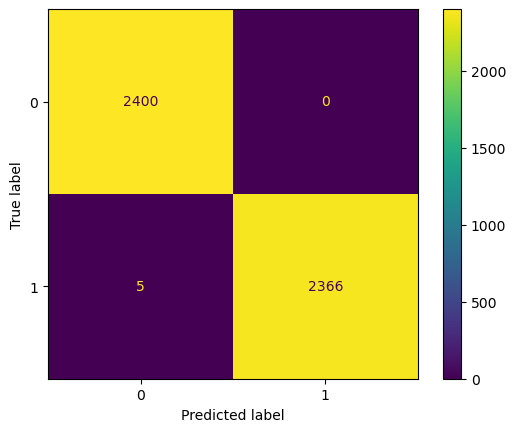

In [24]:
# predict on the test set using the optimal model
y_pred = rf.predict(X_test)

# visualize confusion matrix
log_cm = confusion_matrix(y_test, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
log_disp.plot()

The model performs quite well on test set. Only 5 claim video has been wrongly classified as opinion. Other observations' class are all correct.